# 🧠 CIFAR-10 이미지 분류기 (PyTorch)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋 불러오기
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = trainset.classes

In [ ]:
# 이미지 시각화 함수
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

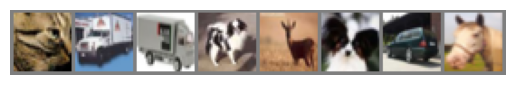

cat truck truck dog deer dog automobile horse


In [ ]:
# 데이터 확인
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8]))
print(' '.join(f'{classes[labels[j]]}' for j in range(8)))

In [ ]:
# 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

In [ ]:
# 손실함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 학습
EPOCHS = 50
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}')

Epoch 1, Loss: 1.3456
Epoch 2, Loss: 0.9656
Epoch 3, Loss: 0.8038
Epoch 4, Loss: 0.6840
Epoch 5, Loss: 0.5810
Epoch 6, Loss: 0.4841
Epoch 7, Loss: 0.3986
Epoch 8, Loss: 0.3184
Epoch 9, Loss: 0.2490
Epoch 10, Loss: 0.1907
Epoch 11, Loss: 0.1526
Epoch 12, Loss: 0.1230
Epoch 13, Loss: 0.0980
Epoch 14, Loss: 0.0947
Epoch 15, Loss: 0.0768
Epoch 16, Loss: 0.0660
Epoch 17, Loss: 0.0678
Epoch 18, Loss: 0.0662
Epoch 19, Loss: 0.0529
Epoch 20, Loss: 0.0612
Epoch 21, Loss: 0.0508
Epoch 22, Loss: 0.0563
Epoch 23, Loss: 0.0548
Epoch 24, Loss: 0.0420
Epoch 25, Loss: 0.0432
Epoch 26, Loss: 0.0466
Epoch 27, Loss: 0.0432
Epoch 28, Loss: 0.0502
Epoch 29, Loss: 0.0394
Epoch 30, Loss: 0.0446
Epoch 31, Loss: 0.0409
Epoch 32, Loss: 0.0390
Epoch 33, Loss: 0.0373
Epoch 34, Loss: 0.0395
Epoch 35, Loss: 0.0395
Epoch 36, Loss: 0.0419
Epoch 37, Loss: 0.0342
Epoch 38, Loss: 0.0302
Epoch 39, Loss: 0.0449
Epoch 40, Loss: 0.0303
Epoch 41, Loss: 0.0347
Epoch 42, Loss: 0.0389
Epoch 43, Loss: 0.0328
Epoch 44, Loss: 0.03

In [ ]:
# 정확도 측정
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f' Test Accuracy: {100 * correct / total:.2f}%')

 Test Accuracy: 70.04%


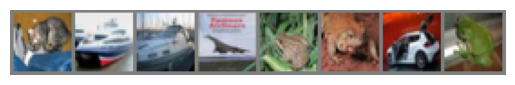

GroundTruth: cat ship ship airplane frog frog automobile frog
Predicted  : cat ship ship ship frog frog automobile deer


In [ ]:
# 예측 결과 시각화
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images[:8].cpu()))
print('GroundTruth:', ' '.join(classes[labels[j]] for j in range(8)))
print('Predicted  :', ' '.join(classes[predicted[j]] for j in range(8)))